# Semantic Embedding Pipeline Demo
_Author: Lia Shen (under guidance of Prof. Ziyang Song)_

## Module 1: Data Preprocessing

### Step 1: Data Preprocessing – Load Raw Mapping Table
This step loads the original Phecode–ICD mapping file (downloaded from Ohewas or related source).  
We will use this file as the starting point to build ICD-9 and ICD-10 codebooks.

*Input:* `Phecode_map_v1_2_icd9_icd10cm.csv`  

In [2]:
import pandas as pd
from pathlib import Path

# Define paths
DATA_DIR = Path("../ref_data")
DOWNLOAD_DIR = Path("../downloads")
INPUT_PATH = DOWNLOAD_DIR / "Phecode_map_v1_2_icd9_icd10cm.csv"
OUTPUT_ICD9 = DATA_DIR / "ccscode_icd9_selected_with_multilevel.csv"
OUTPUT_ICD10 = DATA_DIR / "ccscode_icd10_selected_with_multilevel.csv"

# Load original CSV
df = pd.read_csv(INPUT_PATH)
print("Loaded data:", df.shape)
df.head(10)

Loaded data: (105284, 6)


,ICD,Flag,ICDString,Phecode,PhecodeString,PhecodeCategory
0,001,9,Cholera,8.0,Intestinal infection,Intestinal infection
1,001.0,9,Cholera due to Vibrio cholerae,8.0,Intestinal infection,Intestinal infection
2,001.1,9,Cholera due to Vibrio cholerae el tor,8.0,Intestinal infection,Intestinal infection
3,001.9,9,Cholera NOS,8.0,Intestinal infection,Intestinal infection
4,002,9,Typhoid and paratyphoid fevers,8.0,Intestinal infection,Intestinal infection
5,002.0,9,Typhoid fever,8.5,Bacterial enteritis,Intestinal infection
6,002.1,9,Paratyphoid fever A,8.0,Intestinal infection,Intestinal infection
7,002.2,9,Paratyphoid fever B,8.0,Intestinal infection,Intestinal infection
8,002.3,9,Paratyphoid fever C,8.0,Intestinal infection,Intestinal infection
9,002.9,9,Paratyphoid fever NOS,8.0,Intestinal infection,Intestinal infection


### Step 2: Keep Only Integer ICD Codes
Some ICD codes (e.g., `250.00`- ICD 9, `S49.042A` - ICD 10) include decimals representing sub-categories.  
For standard hierarchical mapping we keep only integer ICD codes (e.g., `250`, `401`).
This step removes those sub-codes for a clean base set.

In [9]:
df_filtered = df[~df["ICD"].astype(str).str.contains(r"\.")].copy()
print("After filtering:", df_filtered.shape)
df_filtered.head(10)

After filtering: (2233, 6)


,ICD,Flag,ICDString,Phecode,PhecodeString,PhecodeCategory
0,001,9,Cholera,8.0,Intestinal infection,Intestinal infection
4,002,9,Typhoid and paratyphoid fevers,8.0,Intestinal infection,Intestinal infection
10,003,9,Other salmonella infections,8.5,Bacterial enteritis,Intestinal infection
22,004,9,Shigellosis,8.5,Bacterial enteritis,Intestinal infection
29,005,9,Other food poisoning (bacterial),8.5,Bacterial enteritis,Intestinal infection
39,006,9,Amebiasis,8.0,Intestinal infection,Intestinal infection
49,007,9,Other protozoal intestinal diseases,8.0,Intestinal infection,Intestinal infection
58,008,9,Intestinal infections due to other organisms,8.0,Intestinal infection,Intestinal infection
89,009,9,Ill-defined intestinal infections,8.0,Intestinal infection,Intestinal infection
94,010,9,Primary tuberculous infection,10.0,Tuberculosis,bacterial infection


### Step 2.5: Remove Duplicate ICD Codes
After removing decimals, some ICDs become identical (e.g., `250.00` → `250`, `250.0` → `250`).
We drop duplicates based on both **ICD** and **ICDString** to ensure a clean unique code list.

In [10]:
print("Before deduplication:", len(df_filtered))

df_dedup = df_filtered.drop_duplicates(
    subset=["ICD", "ICDString"], keep="first"
).copy()

print("After deduplication:", len(df_dedup))

df_filtered = df_dedup
df_filtered.head(5)

Before deduplication: 2233
After deduplication: 2215


,ICD,Flag,ICDString,Phecode,PhecodeString,PhecodeCategory
0,001,9,Cholera,8.0,Intestinal infection,Intestinal infection
4,002,9,Typhoid and paratyphoid fevers,8.0,Intestinal infection,Intestinal infection
10,003,9,Other salmonella infections,8.5,Bacterial enteritis,Intestinal infection
22,004,9,Shigellosis,8.5,Bacterial enteritis,Intestinal infection
29,005,9,Other food poisoning (bacterial),8.5,Bacterial enteritis,Intestinal infection


### Step 3: Split by Flag (ICD-9 vs ICD-10)
Each row in the mapping file includes a `Flag` column marking the ICD version:  
- **9 → ICD-9**  
- **10 → ICD-10**

We split the cleaned data into two separate tables and save them for later mapping with CCS and Major categories.

*Output:* `ccscode_icd9_selected_with_multilevel.csv`, `ccscode_icd10_selected_with_multilevel.csv`

In [12]:
df_filtered["Flag"] = df_filtered["Flag"].astype(str).str.strip()
df_icd9 = df_filtered[df_filtered["Flag"] == "9"][["ICD", "Flag", "ICDString"]].copy()
df_icd10 = df_filtered[df_filtered["Flag"] == "10"][["ICD", "Flag", "ICDString"]].copy()

print(f"ICD-9 count: {len(df_icd9)},  ICD-10 count: {len(df_icd10)}")

# Save to ref_data folder
df_icd9.to_csv(OUTPUT_ICD9, index=False)
df_icd10.to_csv(OUTPUT_ICD10, index=False)

print("Saved outputs:")
print("  - ", OUTPUT_ICD9)
print("  - ", OUTPUT_ICD10)

# Preview
display(df_icd9.head(5))
display(df_icd10.head(5))

ICD-9 count: 937,  ICD-10 count: 1278
Saved outputs:
  -  ../ref_data/ccscode_icd9_selected_with_multilevel.csv
  -  ../ref_data/ccscode_icd10_selected_with_multilevel.csv


,ICD,Flag,ICDString
0,001,9,Cholera
4,002,9,Typhoid and paratyphoid fevers
10,003,9,Other salmonella infections
22,004,9,Shigellosis
29,005,9,Other food poisoning (bacterial)


,ICD,Flag,ICDString
14669,I65,10,Occlusion and stenosis of precerebral arteries...
14692,T58,10,Toxic effect of carbon monoxide
14802,N83,10,"Noninflammatory disorders of ovary, fallopian ..."
14881,H46,10,Optic neuritis
14885,I37,10,Nonrheumatic pulmonary valve disorders


### Step 4: ICD-9 Match  
We integrate CCS information into the ICD-9 codebook to enrich hierarchical mapping.  
This step includes two sub-parts:  

- **4.1 Parse CCS Mapping File:** Convert Appendix A (CCS → ICD-9) into a structured CSV.  
- **4.2 Merge with ICD-9 Codebook:** Match the parsed mapping to our ICD-9 table (`ccscode_icd9_selected_with_multilevel.csv`).  

Data source: [HCUP CCS tool page](https://hcup-us.ahrq.gov/toolssoftware/ccs/ccs.jsp#download)

#### Step 4.1: Parse CCS Mapping File (Appendix A)

Each section of `AppendixASingleDX.txt` starts with a CCS category and description (e.g., `1 Tuberculosis`),   
followed by its ICD-9-CM codes. We parse this text file into a one-to-one table for later merge.  

*Input:* `AppendixASingleDX.txt`  
*Output:* `ICD9CM_to_CCSCM.csv` (saved to `ref_data/`)


In [13]:
import csv
from pathlib import Path
import pandas as pd

DATA_DIR = Path("../ref_data")
DOWNLOAD_DIR = Path("../downloads")
INPUT_PATH = DOWNLOAD_DIR / "AppendixASingleDX.txt"
OUTPUT_PATH = DATA_DIR / "ICD9CM_to_CCSCM.csv"

output_rows = []
current_ccs_code = None
current_ccs_string = None

with open(INPUT_PATH, "r") as f:
    for line in f:
        line = line.rstrip()
        if not line.strip():
            continue  # Skip empty lines
        if not line[0].isspace():  # New CCS header
            parts = line.strip().split(maxsplit=1)
            if len(parts) == 2 and parts[0].isdigit():
                current_ccs_code, current_ccs_string = parts
            continue
        for icd in line.strip().split():
            output_rows.append([icd, current_ccs_code, current_ccs_string])

with open(OUTPUT_PATH, "w", newline="") as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(["ICD", "CCSCode", "CCSString"])
    writer.writerows(output_rows)

print(f"Parsed {len(output_rows):,} ICD–CCS pairs")
print(f"Saved to {OUTPUT_PATH}")

pd.read_csv(OUTPUT_PATH).head(10)

Parsed 15,082 ICD–CCS pairs
Saved to ../ref_data/ICD9CM_to_CCSCM.csv


,ICD,CCSCode,CCSString
0,01000,1,Tuberculosis
1,01001,1,Tuberculosis
2,01002,1,Tuberculosis
3,01003,1,Tuberculosis
4,01004,1,Tuberculosis
5,01005,1,Tuberculosis
6,01006,1,Tuberculosis
7,01010,1,Tuberculosis
8,01011,1,Tuberculosis
9,01012,1,Tuberculosis


#### Step 4.2: Match ICD-9 Codes with CCS Mapping  

We now integrate the parsed CCS mapping table into our ICD-9 codebook.  
This step adds two new columns — `CCSCode` and `CCSString` — to  `ccscode_icd9_selected_with_multilevel.csv`.  

Matching strategy:  
1. Try **exact matches** on the 5-digit ICD9 code (e.g. `25000`)  
2. Try **padded variants** (`+0`, `+00`) if needed  
3. Fallback: **startswith** match (prefix-based for truncated codes)  
4. If no match found → leave blank  

*Input:*  
- `ref_data/ccscode_icd9_selected_with_multilevel.csv`  
- `ref_data/ICD9CM_to_CCSCM.csv`  

*Output:*  
- Overwritten `ref_data/ccscode_icd9_selected_with_multilevel.csv`  
  (now with extra `CCSCode`, `CCSString` columns)

In [3]:
import csv
import pandas as pd
from pathlib import Path

DATA_DIR = Path("../ref_data")
ICD_FILE = DATA_DIR / "ccscode_icd9_selected_with_multilevel.csv"
CCS_MAP_FILE = DATA_DIR / "ICD9CM_to_CCSCM.csv"

# 1. Load ICD9→CCS mapping into dictionary
icd_to_ccs = {}
with open(CCS_MAP_FILE, 'r') as f:
    reader = csv.reader(f)
    next(reader)  # skip header
    for row in reader:
        icd_full = row[0].strip()
        ccs_code = row[1].strip()
        ccs_string = row[2].strip()
        if icd_full not in icd_to_ccs:
            icd_to_ccs[icd_full] = (ccs_code, ccs_string)

print(f"Loaded {len(icd_to_ccs):,} ICD–CCS mappings")

# 2. Define match function
def match_icd(icd_code):
    # Priority 1: exact match + '00'
    if icd_code + '00' in icd_to_ccs:
        return icd_to_ccs[icd_code + '00']
    # Priority 2: exact match + '0'
    if icd_code + '0' in icd_to_ccs:
        return icd_to_ccs[icd_code + '0']
    # Priority 3: prefix match
    for key in icd_to_ccs:
        if key.startswith(icd_code):
            suffix = key[len(icd_code):]
            if suffix == '' or suffix.isdigit():
                return icd_to_ccs[key]
    return ("", "")  # no match

# 3. Load ICD-9 table and apply mapping
df_icd = pd.read_csv(ICD_FILE, dtype=str)
mask_icd9 = df_icd["Flag"] == "9"

matched_codes = []
matched_strings = []

for _, row in df_icd.iterrows():
    if row["Flag"] == "9":
        ccs_code, ccs_str = match_icd(row["ICD"].strip())
    else:
        ccs_code, ccs_str = ("", "")
    matched_codes.append(ccs_code)
    matched_strings.append(ccs_str)

df_icd["CCSCode"] = matched_codes
df_icd["CCSString"] = matched_strings

# Step 4: Save back to same file (overwrite)
df_icd.to_csv(ICD_FILE, index=False)

print(f"Updated ICD-9 codebook with CCSCode & CCSString columns")
print(f"Saved to: {ICD_FILE}")
df_icd.head(10)

Loaded 15,072 ICD–CCS mappings
Updated ICD-9 codebook with CCSCode & CCSString columns
Saved to: ../ref_data/ccscode_icd9_selected_with_multilevel.csv


,ICD,Flag,ICDString,CCSCode,CCSString
0,001,9,Cholera,135,Intestinal infection
1,002,9,Typhoid and paratyphoid fevers,135,Intestinal infection
2,003,9,Other salmonella infections,135,Intestinal infection
3,004,9,Shigellosis,135,Intestinal infection
4,005,9,Other food poisoning (bacterial),135,Intestinal infection
5,006,9,Amebiasis,135,Intestinal infection
6,007,9,Other protozoal intestinal diseases,135,Intestinal infection
7,008,9,Intestinal infections due to other organisms,135,Intestinal infection
8,009,9,Ill-defined intestinal infections,135,Intestinal infection
9,010,9,Primary tuberculous infection,1,Tuberculosis


### Step 5: Match ICD-10 Codes with CCS Mapping

We now integrate CCS information for ICD-10-CM codes.  
The mapping data come from the [GraphCare resources repository](https://github.com/pat-jj/GraphCare/tree/main/resources):  

- **ICD10CM_to_CCSCM.csv** → ICD-10 → CCS code mapping  
- **CCSCM.csv** → CCS code → category name mapping  

These two files are combined and matched to our existing  
`ccscode_icd10_selected_with_multilevel.csv`,  
adding two new columns: `CCSCode` and `CCSString`.  

**Matching strategy:**  
1. Match full ICD codes (e.g. `I65.01`) → exact mapping.  
2. If not found, look for base ICD (e.g. `I65`) variants ending in `.0` or `.00`.  
3. If still not found, take the first available match under that base.  
4. Unmatched codes remain blank.  

*Input:*  
- `ref_data/ccscode_icd10_selected_with_multilevel.csv`  
- `downloads/ICD10CM_to_CCSCM.csv`  
- `downloads/CCSCM.csv`  

*Output:*  
- Overwritten `ref_data/ccscode_icd10_selected_with_multilevel.csv`

In [4]:
import csv
import pandas as pd
from pathlib import Path

DATA_DIR = Path("../ref_data")
DOWNLOAD_DIR = Path("../downloads")

ICD_FILE = DATA_DIR / "ccscode_icd10_selected_with_multilevel.csv"
ICD10_TO_CCS_FILE = DOWNLOAD_DIR / "ICD10CM_to_CCSCM.csv"
CCS_STRING_FILE = DOWNLOAD_DIR / "CCSCM.csv"

# 1. Load ICD10→CCS mapping
icd10_to_ccs_full = {}           
icd_base_to_full_codes = {}

with open(ICD10_TO_CCS_FILE, newline='') as f:
    reader = csv.DictReader(f)
    for row in reader:
        full_icd = row["ICD10CM"].strip()
        base = full_icd.split('.')[0]
        icd10_to_ccs_full[full_icd] = row["CCSCM"].strip()
        icd_base_to_full_codes.setdefault(base, []).append(full_icd)

print(f"Loaded {len(icd10_to_ccs_full):,} ICD-10→CCS mappings")

# 2. Load CCS code → CCS name
ccs_to_name = {}
with open(CCS_STRING_FILE, newline='') as f:
    reader = csv.DictReader(f)
    for row in reader:
        ccs_to_name[row["code"].strip()] = row["name"].strip()

# 3. Match ICD10s in the existing file
df_icd10 = pd.read_csv(ICD_FILE, dtype=str)
mask_icd10 = df_icd10["Flag"] == "10"

matched_codes, matched_strings = [], []

for _, row in df_icd10.iterrows():
    if row["Flag"] != "10":
        matched_codes.append("")
        matched_strings.append("")
        continue

    icd = row["ICD"].strip()
    base = icd.split('.')[0]
    matched_code, matched_string = "", ""

    # Priority 1: exact match
    if icd in icd10_to_ccs_full:
        matched_code = icd10_to_ccs_full[icd]
    else:
        # Priority 2: try .0 / .00 endings
        for cand in icd_base_to_full_codes.get(base, []):
            if cand.endswith(".0") or cand.endswith(".00"):
                matched_code = icd10_to_ccs_full[cand]
                break
        # Priority 3: fallback to first available
        if not matched_code and base in icd_base_to_full_codes:
            cand = icd_base_to_full_codes[base][0]
            matched_code = icd10_to_ccs_full[cand]

    if matched_code:
        matched_string = ccs_to_name.get(matched_code, "")

    matched_codes.append(matched_code)
    matched_strings.append(matched_string)

df_icd10["CCSCode"] = matched_codes
df_icd10["CCSString"] = matched_strings

# 4. Save back to same file
df_icd10.to_csv(ICD_FILE, index=False)

print(f"Updated ICD-10 codebook with CCSCode & CCSString columns")
print(f"Saved to: {ICD_FILE}")
df_icd10.head(10)

Loaded 72,446 ICD-10→CCS mappings
Updated ICD-10 codebook with CCSCode & CCSString columns
Saved to: ../ref_data/ccscode_icd10_selected_with_multilevel.csv


,ICD,Flag,ICDString,CCSCode,CCSString
0,I65,10,Occlusion and stenosis of precerebral arteries...,110,Occlusion or stenosis of precerebral arteries
1,T58,10,Toxic effect of carbon monoxide,243,Poisoning by nonmedicinal substances
2,N83,10,"Noninflammatory disorders of ovary, fallopian ...",172,Ovarian cyst
3,H46,10,Optic neuritis,90,Inflammation; infection of eye
4,I37,10,Nonrheumatic pulmonary valve disorders,96,Heart valve disorders
5,I77,10,Other disorders of arteries and arterioles,117,Other circulatory disease
6,N60,10,Benign mammary dysplasia,167,Nonmalignant breast conditions
7,C4A,10,Merkel cell carcinoma,23,Other non-epithelial cancer of skin
8,F14,10,Cocaine related disorders,661,Substance-related disorders
9,F18,10,Inhalant related disorders,661,Substance-related disorders


### Step 6: Add CCS Parent/Child (ICD-9 & ICD-10)

Enrich both ICD-9 and ICD-10 tables with **multi-level CCS** (major/sub) information from AHRQ CCS Appendix C.

Data source: [HCUP CCS tool page](https://hcup-us.ahrq.gov/toolssoftware/ccs/ccs.jsp#download)

**Inputs/Outputs (in-place):**
- `../ref_data/ccscode_icd9_selected_with_multilevel.csv`
- `../ref_data/ccscode_icd10_selected_with_multilevel.csv`
- `../ref_data/manually_edited_ccs_multilevel_code_string.csv`  (multi-level code↔string)
- `../ref_data/manually_edited_ccs_multilevel_to_single.py`     (multi↔single mapping)

We append four columns to both CSVs:
`CCSParentCategory`, `CCSParentString`, `CCSChildCategory`, `CCSChildString`.

In [6]:
import csv
from pathlib import Path
import sys

REF_DIR = Path("../ref_data")
if not REF_DIR.exists():
    raise FileNotFoundError("Expected ../ref_data/ next to notebooks/")

sys.path.append(str(REF_DIR))
from manually_edited_ccs_multilevel_to_single import ccs_multilevel_to_single # type: ignore

MULTI_CODE_STRING_CSV = REF_DIR / "manually_edited_ccs_multilevel_code_string.csv"
assert MULTI_CODE_STRING_CSV.exists(), f"Missing: {MULTI_CODE_STRING_CSV}"

FILES_TO_UPDATE = [
    "ccscode_icd9_selected_with_multilevel.csv",
    "ccscode_icd10_selected_with_multilevel.csv",
]

def enrich_in_place(filename: str):
    input_path = REF_DIR / filename
    temp_path  = REF_DIR / (filename + ".tmp")
    if not input_path.exists():
        raise FileNotFoundError(f"Missing: {input_path}")

    # 1) multi-level CCS code → string
    ccs_code_to_string = {}
    with MULTI_CODE_STRING_CSV.open(newline="") as f:
        reader = csv.DictReader(f)
        for row in reader:
            ccs_code_to_string[row["Multi_CCSCode"].strip()] = row["Multi_CCSString"].strip()

    # 2) reverse mapping: single → list[multi]
    ccs_single_to_multi = {}
    for multi, singles in ccs_multilevel_to_single.items():
        for s in singles:
            ccs_single_to_multi.setdefault(s.strip(), []).append(multi.strip())

    # 3) read, enrich, overwrite same file
    with input_path.open(newline="") as infile, temp_path.open("w", newline="") as outfile:
        reader = csv.DictReader(infile)
        fieldnames = reader.fieldnames + [
            "CCSParentCategory", "CCSParentString",
            "CCSChildCategory",  "CCSChildString",
        ]
        writer = csv.DictWriter(outfile, fieldnames=fieldnames)
        writer.writeheader()

        for row in reader:
            ccs_single = (row.get("CCSCode") or "").strip()
            parent = child = parent_str = child_str = ""

            if ccs_single in ccs_single_to_multi:
                for key in ccs_single_to_multi[ccs_single]:
                    if "." in key:   # child like "9.1"
                        child = key
                        child_str = ccs_code_to_string.get(child, "")
                    else:            # parent like "9"
                        parent = key
                        parent_str = ccs_code_to_string.get(parent, "")

            row["CCSParentCategory"] = parent
            row["CCSParentString"]   = parent_str
            row["CCSChildCategory"]  = child
            row["CCSChildString"]    = child_str
            writer.writerow(row)

    temp_path.replace(input_path)
    print(f"Updated: {input_path.name}")

for fname in FILES_TO_UPDATE:
    enrich_in_place(fname)
    display(pd.read_csv(REF_DIR / fname, dtype=str).head())

Updated: ccscode_icd9_selected_with_multilevel.csv


,ICD,Flag,ICDString,CCSCode,CCSString,CCSParentCategory,CCSParentString,CCSChildCategory,CCSChildString
0,001,9,Cholera,135,Intestinal infection,9,Diseases of the digestive system,9.1,Intestinal infection
1,002,9,Typhoid and paratyphoid fevers,135,Intestinal infection,9,Diseases of the digestive system,9.1,Intestinal infection
2,003,9,Other salmonella infections,135,Intestinal infection,9,Diseases of the digestive system,9.1,Intestinal infection
3,004,9,Shigellosis,135,Intestinal infection,9,Diseases of the digestive system,9.1,Intestinal infection
4,005,9,Other food poisoning (bacterial),135,Intestinal infection,9,Diseases of the digestive system,9.1,Intestinal infection


Updated: ccscode_icd10_selected_with_multilevel.csv


,ICD,Flag,ICDString,CCSCode,CCSString,CCSParentCategory,CCSParentString,CCSChildCategory,CCSChildString
0,I65,10,Occlusion and stenosis of precerebral arteries...,110,Occlusion or stenosis of precerebral arteries,7,Diseases of the circulatory system,7.3,Cerebrovascular disease
1,T58,10,Toxic effect of carbon monoxide,243,Poisoning by nonmedicinal substances,16,Injury and poisoning,16.11,Poisoning
2,N83,10,"Noninflammatory disorders of ovary, fallopian ...",172,Ovarian cyst,10,Diseases of the genitourinary system,10.3,Diseases of female genital organs
3,H46,10,Optic neuritis,90,Inflammation; infection of eye,6,Diseases of the nervous system and sense organs,6.7,Eye disorders
4,I37,10,Nonrheumatic pulmonary valve disorders,96,Heart valve disorders,7,Diseases of the circulatory system,7.2,Diseases of the heart


### Step 7: Combine ICD-9 and ICD-10 (with CCS)

Now that both `ccscode_icd9_selected_with_multilevel.csv` and `ccscode_icd10_selected_with_multilevel.csv`
have been fully enriched with CCS single-level and multi-level information,  
we merge them into a single unified reference file.

- **Input:**
  - `ref_data/ccscode_icd9_selected_with_multilevel.csv`
  - `ref_data/ccscode_icd10_selected_with_multilevel.csv`

- **Operation:**
  Concatenate both tables (ICD-10 rows appended to ICD-9)  
  while keeping the shared column structure consistent.

- **Output:**
  - `ref_data/icd_9_10_w_ccs_combined_cleaned.csv`


In [10]:
import pandas as pd
from pathlib import Path

REF_DIR = Path("../ref_data")

# Input paths
icd9_path = REF_DIR / "ccscode_icd9_selected_with_multilevel.csv"
icd10_path = REF_DIR / "ccscode_icd10_selected_with_multilevel.csv"

# Output path
combined_path = REF_DIR / "icd_9_10_w_ccs_combined_cleaned.csv"

# Read both
icd9_df = pd.read_csv(icd9_path, dtype=str)
icd10_df = pd.read_csv(icd10_path, dtype=str)

# Concatenate (reset index)
combined_df = pd.concat([icd9_df, icd10_df], ignore_index=True)

# Save merged file
combined_df.to_csv(combined_path, index=False)

print(f"Combined dataset saved to: {combined_path}")

print("\n--- Preview (first 5 rows) ---")
display(combined_df.head())
print("\n--- Preview (last 5 rows) ---")
display(combined_df.tail())
print(f"\nTotal rows: {len(combined_df)}")

Combined dataset saved to: ../ref_data/icd_9_10_w_ccs_combined_cleaned.csv

--- Preview (first 5 rows) ---


,ICD,Flag,ICDString,CCSCode,CCSString,CCSParentCategory,CCSParentString,CCSChildCategory,CCSChildString
0,001,9,Cholera,135,Intestinal infection,9,Diseases of the digestive system,9.1,Intestinal infection
1,002,9,Typhoid and paratyphoid fevers,135,Intestinal infection,9,Diseases of the digestive system,9.1,Intestinal infection
2,003,9,Other salmonella infections,135,Intestinal infection,9,Diseases of the digestive system,9.1,Intestinal infection
3,004,9,Shigellosis,135,Intestinal infection,9,Diseases of the digestive system,9.1,Intestinal infection
4,005,9,Other food poisoning (bacterial),135,Intestinal infection,9,Diseases of the digestive system,9.1,Intestinal infection



--- Preview (last 5 rows) ---


,ICD,Flag,ICDString,CCSCode,CCSString,CCSParentCategory,CCSParentString,CCSChildCategory,CCSChildString
2210,Q97,10,"Other sex chromosome abnormalities, female phe...",217,Other congenital anomalies,14,Congenital anomalies,14.5,Other congenital anomalies
2211,Q93,10,"Monosomies and deletions from the autosomes, n...",217,Other congenital anomalies,14,Congenital anomalies,14.5,Other congenital anomalies
2212,R55,10,Syncope and collapse,245,Syncope,17,Symptoms; signs; and ill-defined conditions an...,17.1,Symptoms; signs; and ill-defined conditions
2213,T52,10,Toxic effect of organic solvents,243,Poisoning by nonmedicinal substances,16,Injury and poisoning,16.11,Poisoning
2214,T51,10,Toxic effect of alcohol,243,Poisoning by nonmedicinal substances,16,Injury and poisoning,16.11,Poisoning



Total rows: 2215


### Step 8 — Build Hierarchy Trees (ICD-9 & ICD-10)

In this step, we construct **hierarchical graphs** for both ICD-9 and ICD-10 datasets.  
Each CSV (`ccscode_icd9_selected_with_multilevel.csv` and `ccscode_icd10_selected_with_multilevel.csv`) is converted into a **directed acyclic graph (DAG)** representing the parent-child relationships between CCS categories and ICD codes.

Two `.pkl` files will be created and stored under a new folder `trees/` for later analysis or visualization.




In [14]:
import os
import pandas as pd
import networkx as nx
import pickle

# 1. Path setup
BASE_DIR = os.path.dirname(os.path.dirname(__file__)) if "__file__" in globals() else os.getcwd()
DATA_DIR = os.path.join(BASE_DIR, "../ref_data")
TREE_DIR = os.path.join(BASE_DIR, "../trees")
os.makedirs(TREE_DIR, exist_ok=True)

# ICD9 & ICD10 input CSVs
FILES = {
    "icd9": "ccscode_icd9_selected_with_multilevel.csv",
    "icd10": "ccscode_icd10_selected_with_multilevel.csv"
}

for tag, csv_name in FILES.items():
    csv_path = os.path.join(DATA_DIR, csv_name)
    output_pkl = os.path.join(TREE_DIR, f"{tag}_graph.pkl")

    print(f"\n=== Building hierarchy for {tag.upper()} ===")

    # 2. Load and clean data
    df = pd.read_csv(csv_path, dtype=str).fillna("").map(lambda x: x.strip())

    # 3. Build directed graph
    G = nx.DiGraph()
    G.add_node("root")

    # root → parent
    for p in df["CCSParentCategory"].drop_duplicates():
        if p:
            G.add_edge("root", f"cat:{p}")

    # parent → child
    for p, c in df[["CCSParentCategory", "CCSChildCategory"]].drop_duplicates().itertuples(index=False):
        if p and c:
            G.add_edge(f"cat:{p}", f"subcat:{c}")

    # child → CCSCode
    for c, s in df[["CCSChildCategory", "CCSCode"]].drop_duplicates().itertuples(index=False):
        if c and s:
            G.add_edge(f"subcat:{c}", f"ccs:{s}")

    # CCSCode → ICD
    for s, icd in df[["CCSCode", "ICD"]].drop_duplicates().itertuples(index=False):
        if s and icd:
            G.add_edge(f"ccs:{s}", f"icd:{icd}")

    # 4. Validation
    assert nx.is_directed_acyclic_graph(G), "Cycle detected!"
    roots = [n for n in G if G.in_degree(n) == 0]
    assert roots == ["root"], f"Unexpected roots: {roots}"
    multi_parent = [n for n in G if n != "root" and G.in_degree(n) > 1]
    assert not multi_parent, f"Multiple parents: {multi_parent[:10]}"

    leaves = [n for n in G if G.out_degree(n) == 0]
    print(f"Nodes = {G.number_of_nodes()}, Edges = {G.number_of_edges()}, Leaves = {len(leaves)}")
    print("Example path:", nx.shortest_path(G, "root", leaves[0])[:6])

    # 5. Save outputs
    with open(output_pkl, "wb") as f:
        pickle.dump(G, f)

print("\nDone: both ICD-9 and ICD-10 hierarchies built and saved to ./trees/")



=== Building hierarchy for ICD9 ===
Nodes = 1322, Edges = 1321, Leaves = 937
Example path: ['root', 'cat:9', 'subcat:9.1', 'ccs:135', 'icd:001']

=== Building hierarchy for ICD10 ===
Nodes = 1676, Edges = 1675, Leaves = 1278
Example path: ['root', 'cat:7', 'subcat:7.3', 'ccs:110', 'icd:I65']

Done: both ICD-9 and ICD-10 hierarchies built and saved to ./trees/


### Step 9 — Visualize Sample Hierarchy Subtree

Now that both ICD-9 and ICD-10 hierarchies are successfully built,  
this step visualizes **a selected branch (subtree)** from the hierarchy to verify structure and connectivity.

Each hierarchy (`icd9_graph.pkl`, `icd10_graph.pkl`) generated in the previous step is a directed acyclic graph built with four levels:
root → cat:{parent_category} → subcat:{child_category} → ccs:{CCSCode} → icd:{ICD}

This step:
1. Loads the `.pkl` graph (e.g., ICD-9).  
2. Extracts all descendants under a given node (e.g., category `3`).  
3. Plots a small readable subtree using a hierarchical layout.

Notes
- You can change the root to any `cat:` / `subcat:` / `ccs:` node (e.g., `"cat:7"` or `"ccs:135"`).  
- The visualization uses a top-down layout.  
- To prevent overly large graphs, you can limit by `max_depth` or `max_leaves`.  

Example Output
Below we show the subtree rooted at `cat:3` (ICD-9, Diseases of the blood and blood-forming organs).  
This directly displays the figure inline instead of saving it to file.

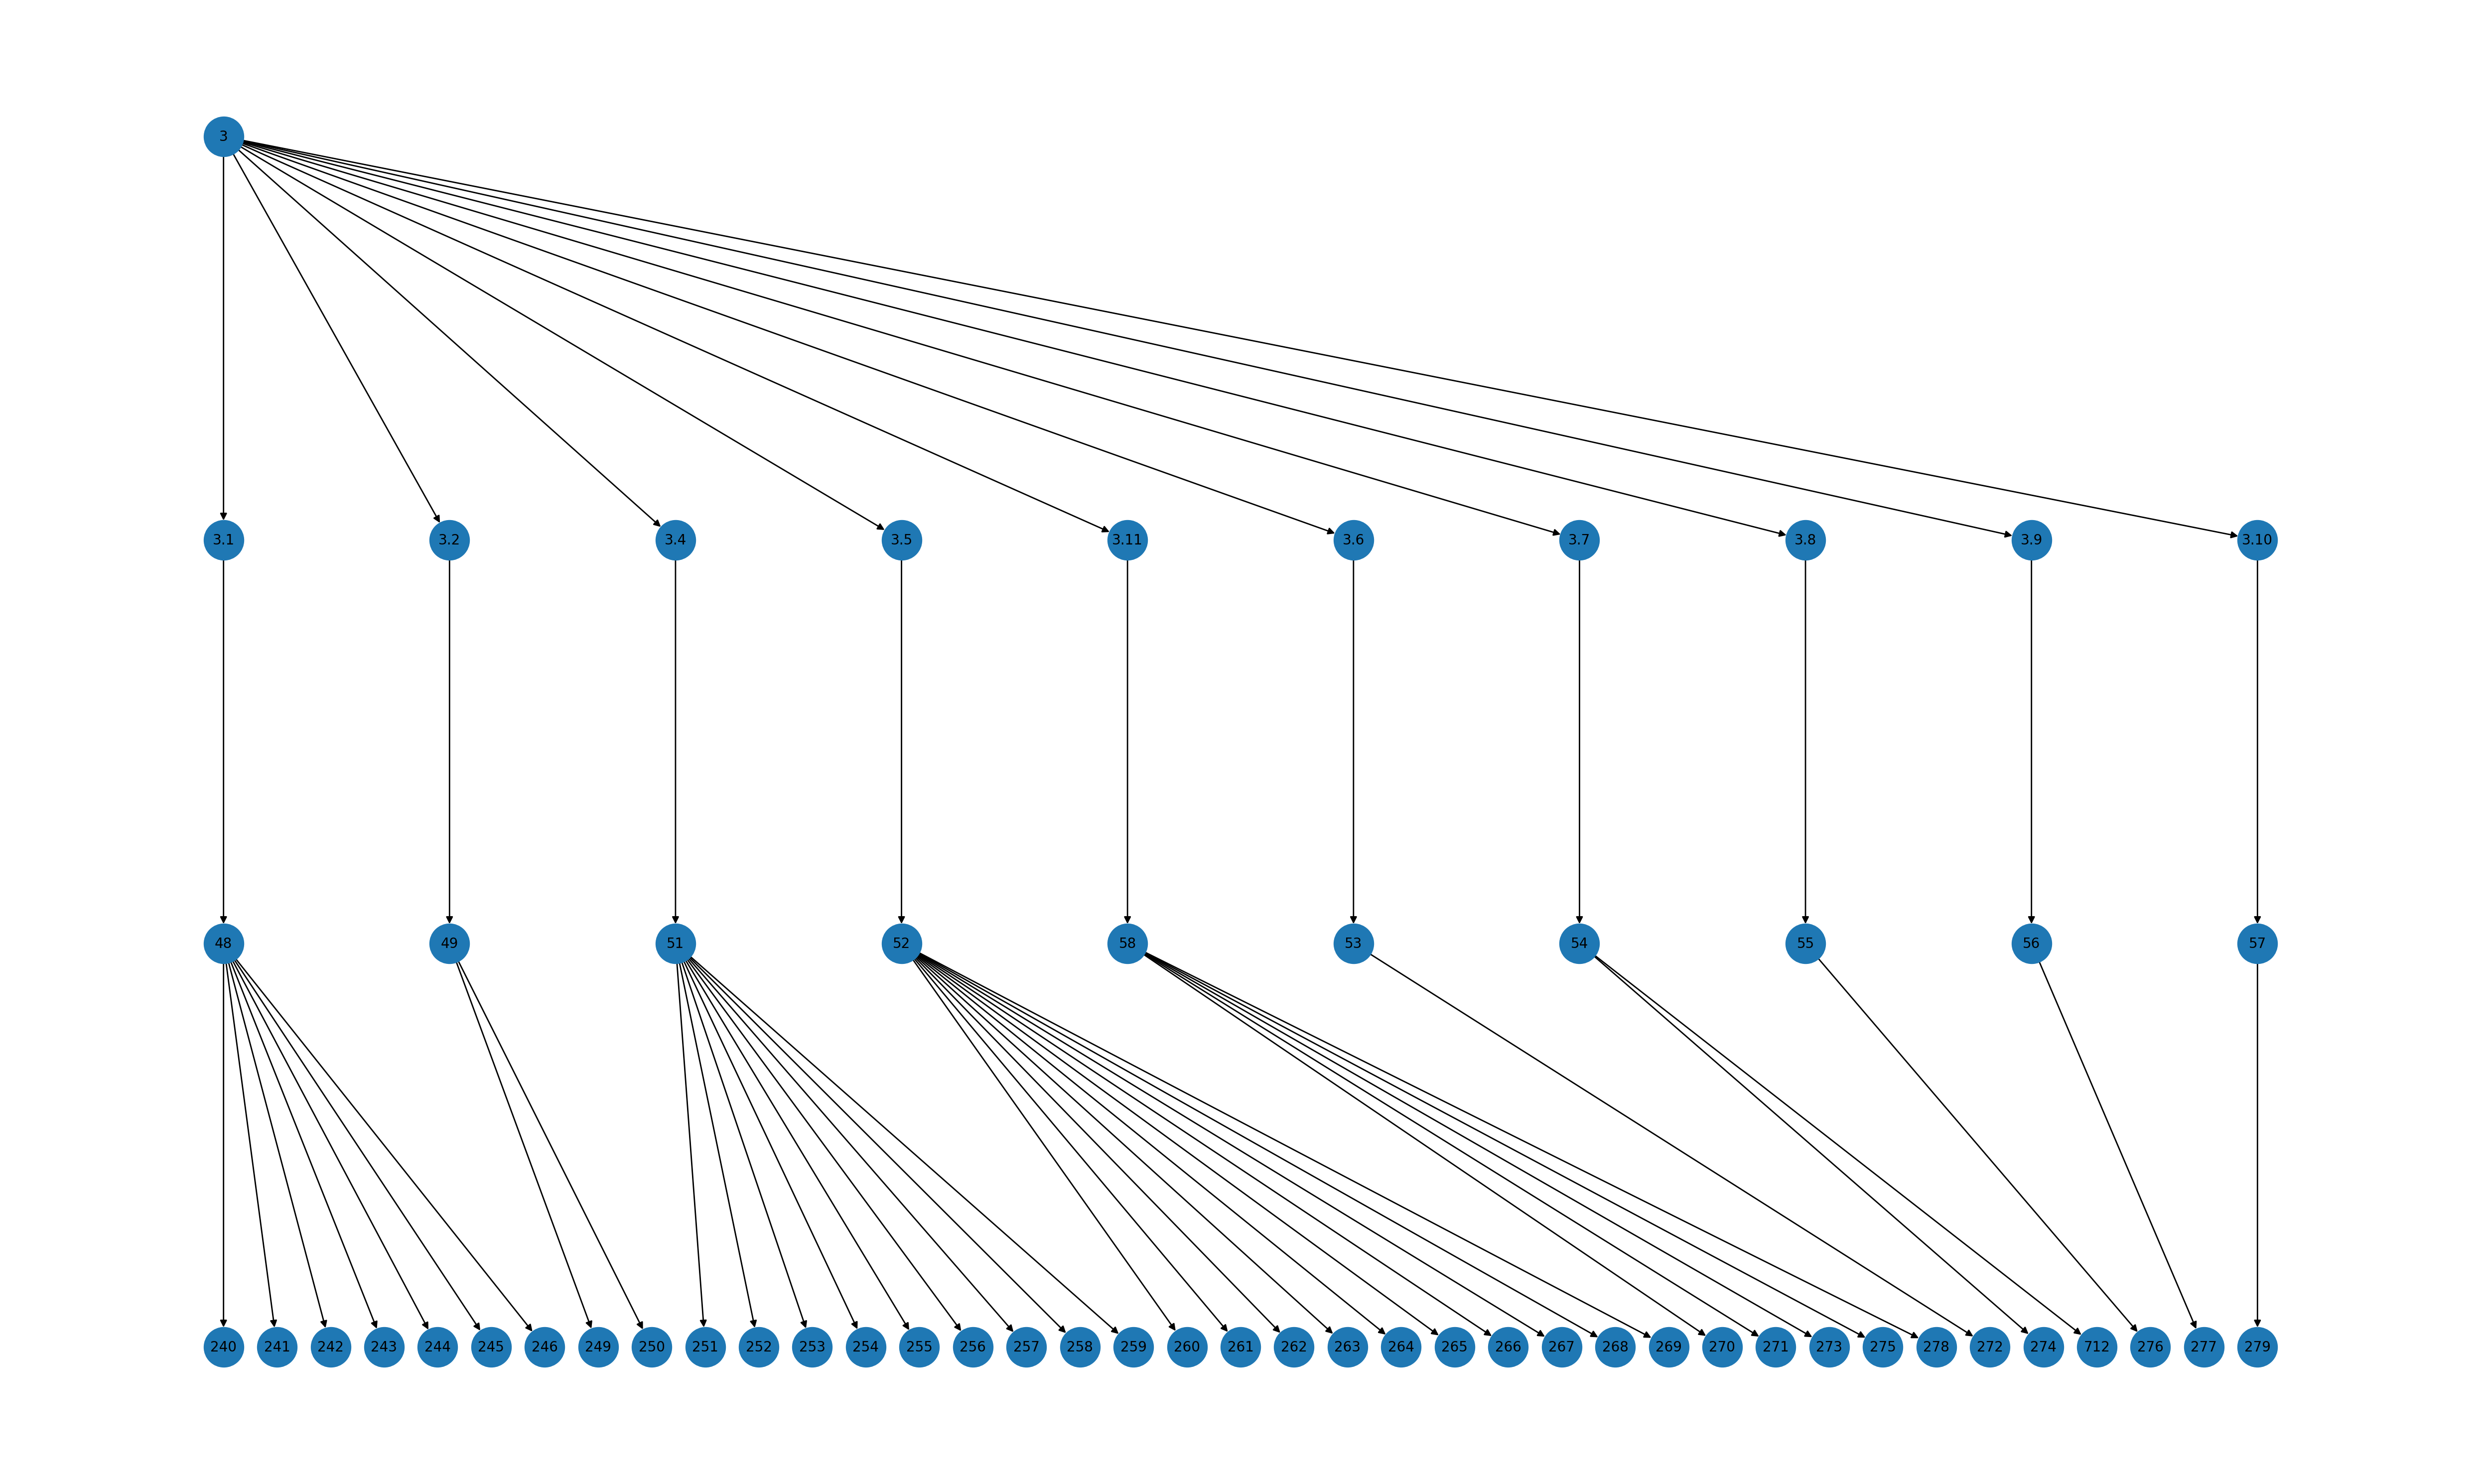

In [18]:
import pickle
from pathlib import Path
from collections import deque, defaultdict
import networkx as nx
import matplotlib.pyplot as plt

# -------- Config --------
PKL_PATH = Path("../trees/icd9_graph.pkl")   # Pickle file generated in Step 8

# -------- Helpers --------
def normalize_id(raw: str) -> str:
    if any(raw.startswith(p) for p in ("cat:", "subcat:", "ccs:", "icd:")):
        return raw
    return f"cat:{raw}"

def get_subtree_nodes(G: nx.DiGraph, root_id: str, max_depth=None, max_leaves=None):
    assert root_id in G, f"Node not found: {root_id}"
    keep = set([root_id])
    q = deque([(root_id, 0)])
    leaves_count = 0
    while q:
        u, d = q.popleft()
        if max_depth is not None and d >= max_depth:
            continue
        for v in G.successors(u):
            keep.add(v)
            q.append((v, d + 1))
            if G.out_degree(v) == 0:
                leaves_count += 1
                if max_leaves and leaves_count >= max_leaves:
                    q.clear()
                    break
    return keep

def hierarchy_pos(G: nx.DiGraph, root: str):
    levels = defaultdict(list)
    for n, dist in nx.single_source_shortest_path_length(G, root).items():
        levels[dist].append(n)
    pos = {}
    max_width = max(len(nodes) for nodes in levels.values())
    max_level = max(levels.keys())
    for level, nodes in levels.items():
        y = 1.0 - (level / max(max_level, 1))
        xs = [i / max(1, len(nodes) - 1) for i in range(len(nodes))]
        for n, x in zip(nodes, xs):
            pos[n] = (x, y)
    return pos

def make_pretty_label(node_id: str):
    return node_id.split(":", 1)[1] if ":" in node_id else node_id

# -------- Main --------
with open(PKL_PATH, "rb") as f:
    G = pickle.load(f)

root = normalize_id("3")
nodes = get_subtree_nodes(G, root, max_depth=None, max_leaves=200)
H = G.subgraph(nodes).copy()

pos = hierarchy_pos(H, root)
labels = {n: make_pretty_label(n) for n in H.nodes()}

plt.figure(figsize=(25, 15), dpi=200)
nx.draw_networkx(H, pos=pos, labels=labels, with_labels=True, node_size=800, font_size=10)
plt.axis("off")
plt.tight_layout()
plt.show()